## Maria Gedye CS204
Mushroom Classification using Decision Tree Classifier

In [1]:
# import neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
#import piplite
#await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve


In [2]:
# data consists of 23 columns and 8125 rows
data = pd.read_csv(r'mushrooms.csv')
data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
print("Dataset shape:", data.shape)

Dataset shape: (8124, 23)


In [4]:
data.info()
#gives detail of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#give the statistics for each column
data.describe()

# count shows total responses
# unique shows number of unique values counted for that feature
# top is the most common value
# and freq gives the number of times the top value occured

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# find how many unique classes in the data
data['class'].unique()

array(['p', 'e'], dtype=object)

In [7]:
# 2 classes; p = poisonous, e = edible
# count how many instances for each of these 2 classes
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

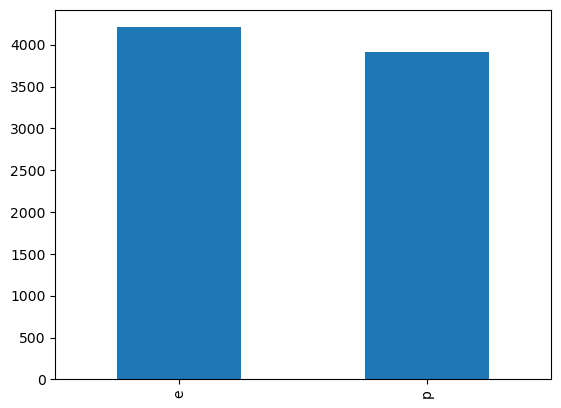

In [8]:
data['class'].value_counts().plot(kind='bar');

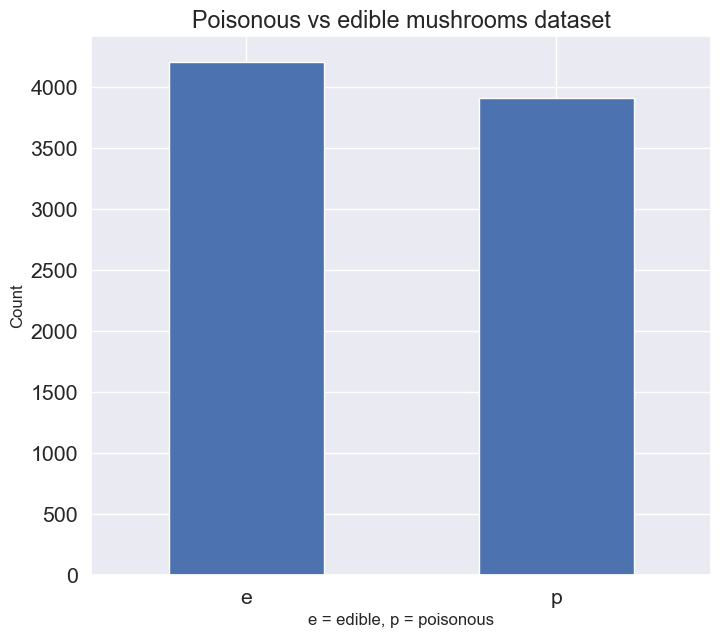

In [9]:
#visualise count of edible/poisonous mushrooms using seaborn

sns.set(font_scale=1.4)
data['class'].value_counts().plot(kind='bar',figsize=(8,7),rot=0)
plt.ylabel('Count',fontsize=12)
plt.xlabel('e = edible, p = poisonous',fontsize=12)
plt.title('Poisonous vs edible mushrooms dataset')

plt.show()

In [10]:
# judging the bar plot, the dataset appears fairly balanced, 4208 and 3916 respectively
# LabelEncoder is used to convert categorical data into ordinal (letters => numbers)
# first convert object types to category type
data = data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [11]:
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [12]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
# remove veil-type as it is not contributing to the data
data['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [14]:
data=data.drop(["veil-type"],axis=1)

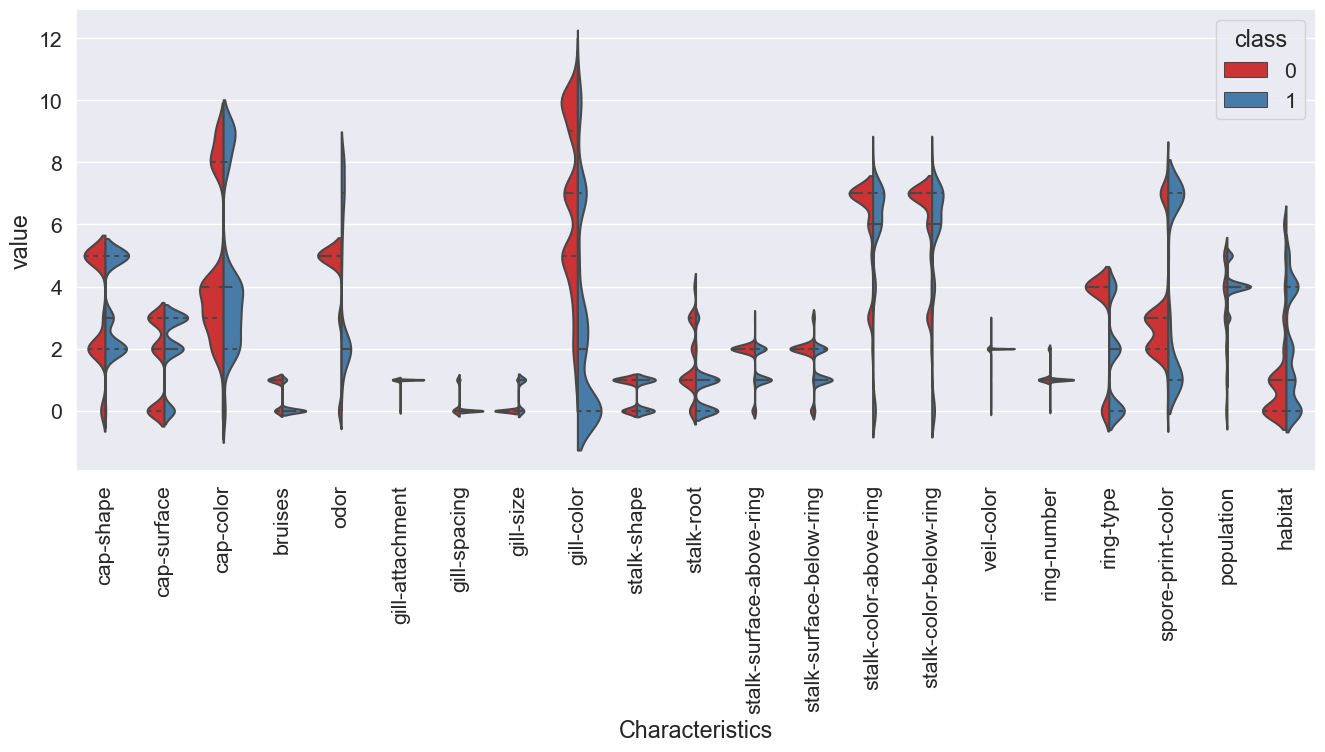

In [15]:
# show distribution of classification characteristics via a violin plot

data_div=pd.melt(data, "class", var_name="Characteristics")
fig,ax=plt.subplots(figsize=(16,6))

p=sns.violinplot(ax=ax,x="Characteristics",y="value",hue="class",data=data_div,inner='quartile',split=True,palette='Set1')

data_no_class=data.drop(["class"],axis=1)

p.set_xticklabels(rotation=90,labels=list(data_no_class.columns));


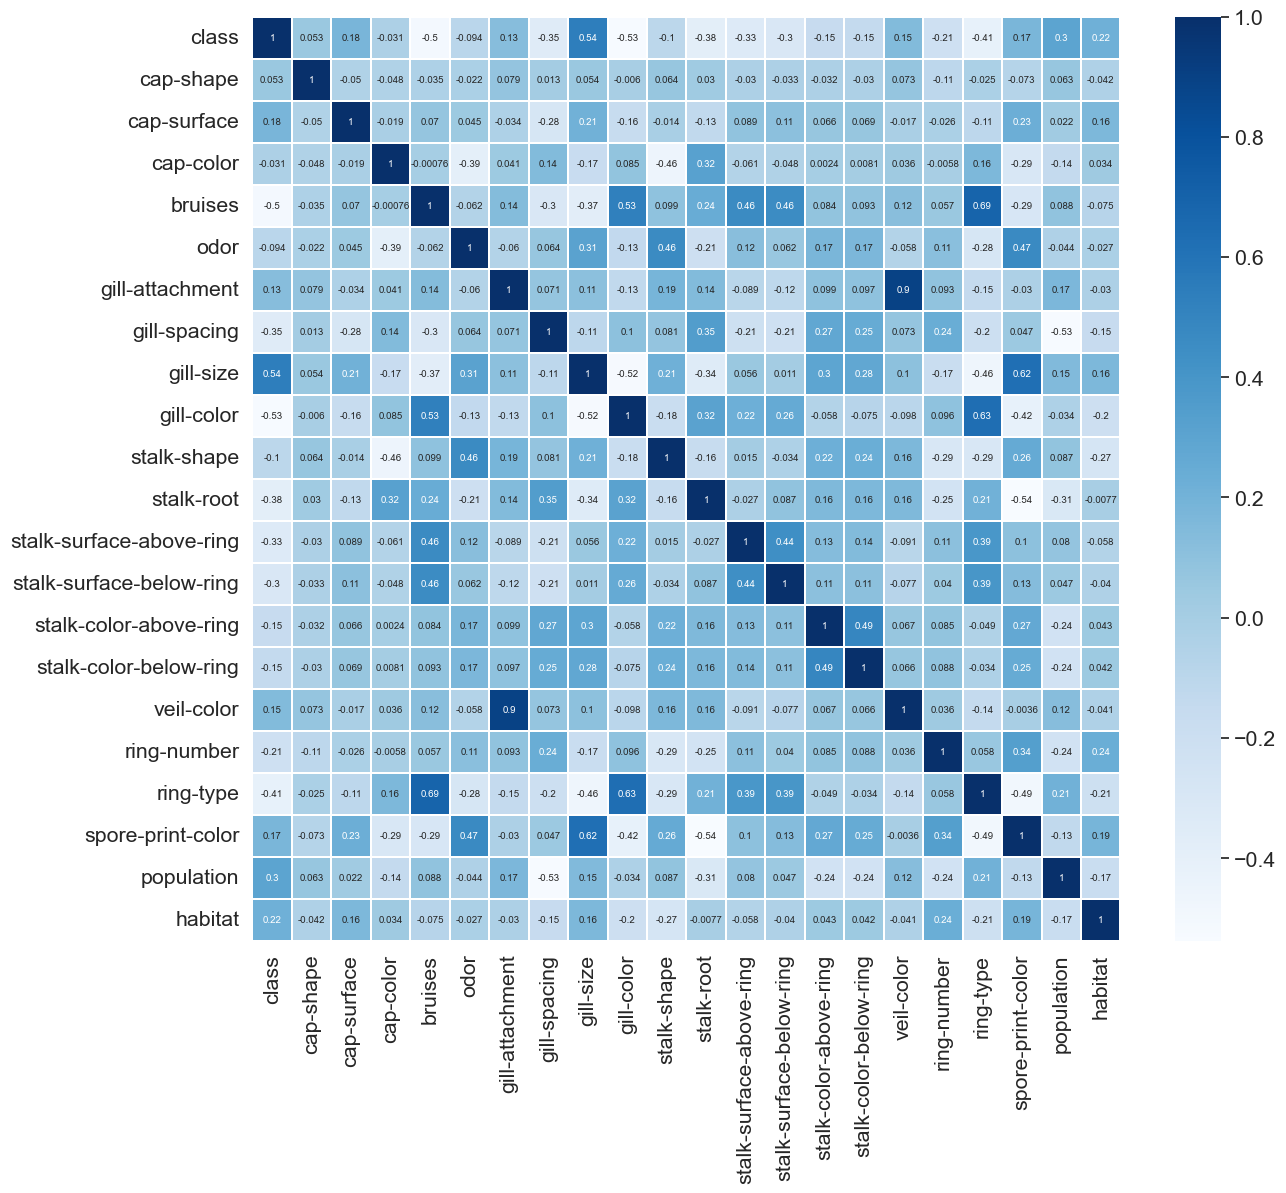

In [16]:
# find any correlations between the characteristics and values using a heatmap

plt.figure(figsize=(14,12))

sns.heatmap(data.corr(),linewidths=.1,cmap="Blues",annot=True,annot_kws={"size":7})

plt.yticks(rotation=0);


In [17]:
# we will look into the least correlating variable, gill-color (-0.53)

data[['class','gill-color']].groupby(['gill-color'],as_index=False).mean().sort_values(by='class',ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


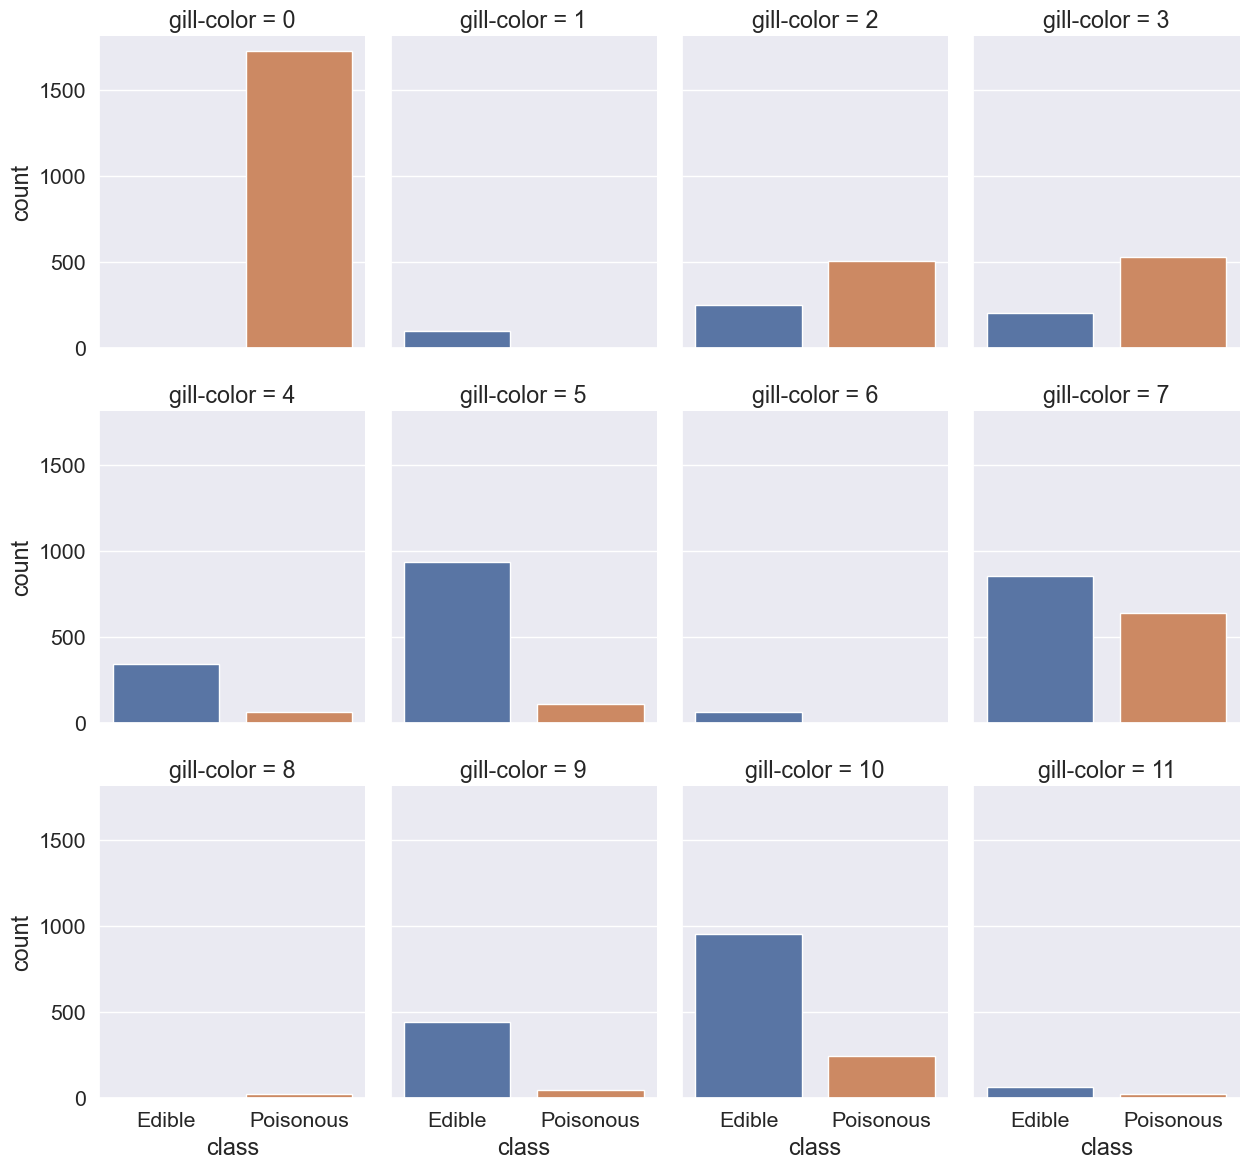

In [18]:
# now display for each gill color (12 in total), how many fall into each class (e/p)

gill_data=data[['class','gill-color']]
gill_data=gill_data[gill_data['gill-color']<=11]

g=sns.catplot(
    data=gill_data, x="class", y=None, col='gill-color',
    kind="count",height=4,aspect=.8,col_wrap=4
)

g.set_xticklabels(["Edible","Poisonous"])

In [19]:
# Now that preprocessing is done, time to split the data into train and test sets
# First remove the existing class column so that the model will determine the class

X=data.drop(['class'],axis=1)
y=data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)


In [20]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [21]:
# set up decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier() #creates object
dt.fit(X_train, y_train) #trains object
y_pred=dt.predict(X_test) #predict response for test data


In [22]:
# check the model accuracy
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [23]:
%pip install pydotplus # fixes pydot import error

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [24]:
import os #fix graphviz executable error
os.environ['PATH']=os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

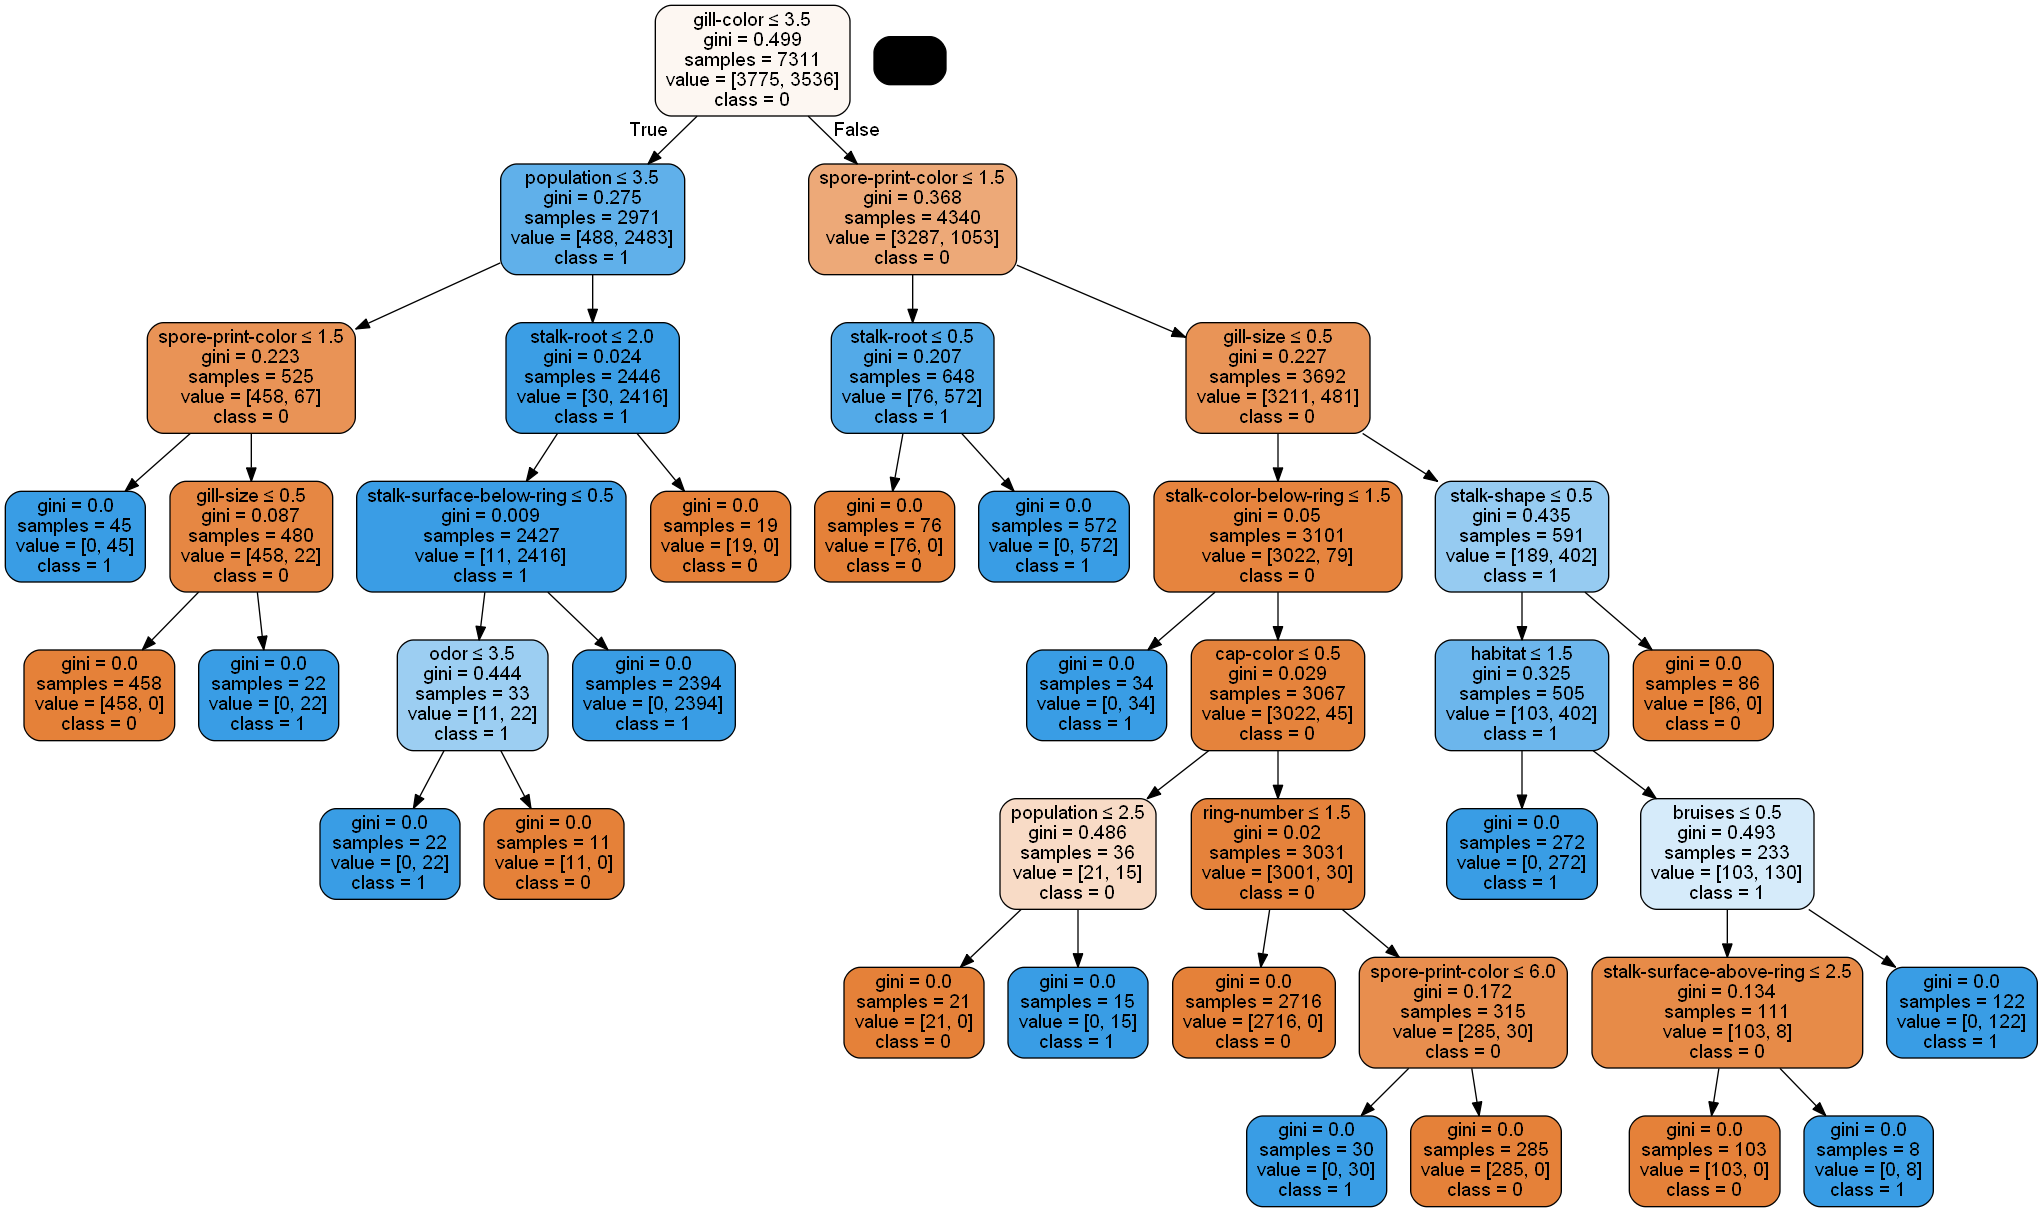

In [25]:
#visualise the decision tree
import six
import sys
sys.modules['sklearn.externals.six']=six
import graphviz

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

feature_cols=list(X)

export_graphviz(dt, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mushrooms.png')
Image(graph.create_png())


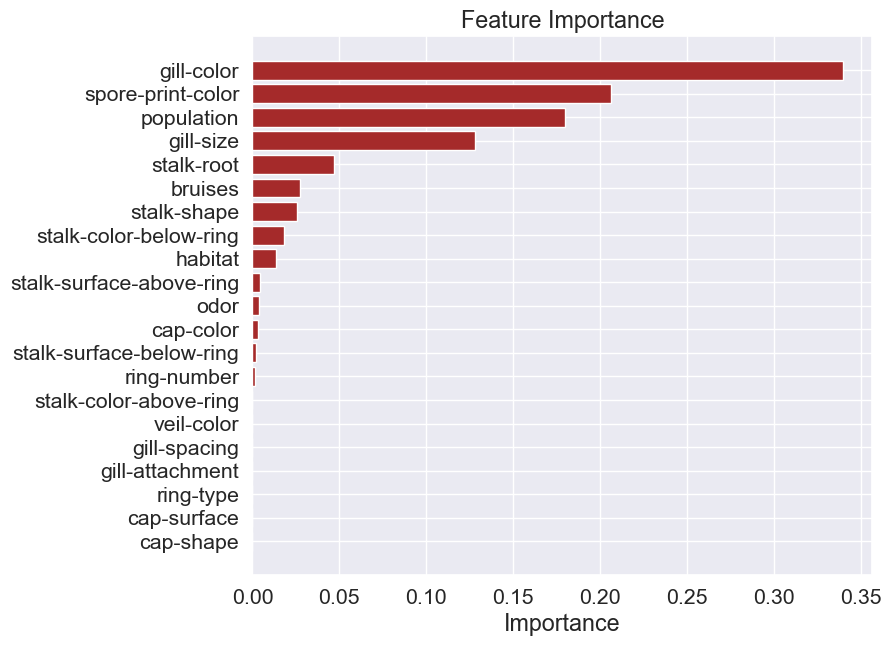

In [26]:
# display feature importance
features_list= X.columns.values
feature_importance= dt.feature_importances_
sorted_idx= np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="brown")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.draw()
plt.show()

In [27]:
#display the classifier tree model's performance
y_pred_dt=dt.predict(X_test)

In [28]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt)) 

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [29]:
#print test accuracy
print("Test Accuracy:  {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Test Accuracy:  100.0%


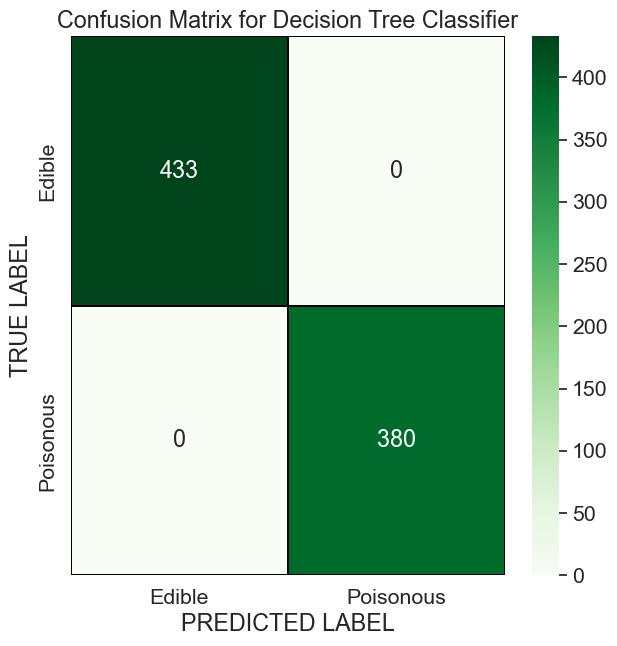

In [30]:
#Confusion/Error matrix which determines the performance of the algorithm
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()